<a href="https://colab.research.google.com/github/The-Algorist/Statisdtics_Colab_Notebooks/blob/main/Team_1_(Data_Exploration).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Data Cleaning, Univariate and Bivariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

**Analysis of survival rate of passengers in the titanic based on their pclass, gender and age**

### b) Defining the Metric for Success

**if the model's prediction is 80% to 99% correct in predicting the outcomes**

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Data from the source provided i.e. csv
#Data link: https://docs.google.com/spreadsheets/d/1sxirf9nOx_noY990r4KTGrFAwv-Kh_ma/edit?usp=sharing&ouid=106030780898197632045&rtpof=true&sd=true
# ---
#
# -
mydata = pd.read_csv("titanic3.csv")

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
mydata.shape

(1309, 14)

In [5]:
# Previewing the top of our dataset
#
mydata.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
# Previewing the bottom of our dataset
# 
mydata.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [7]:
# Checking whether each column has an appropriate datatype
#
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

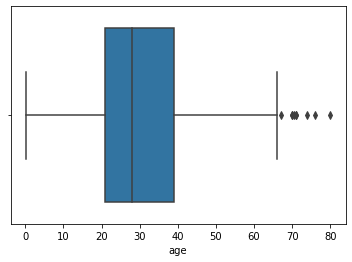

In [8]:
# Checking for Anomalies/Outliers
# check for outliers in age, sibsp, fare, parch
sns.boxplot(x = mydata['age'])




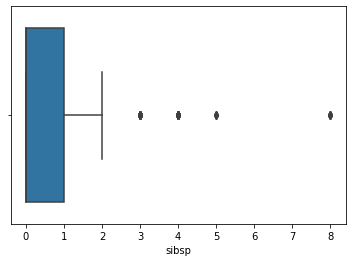

In [10]:
sns.boxplot(x = mydata['sibsp'])

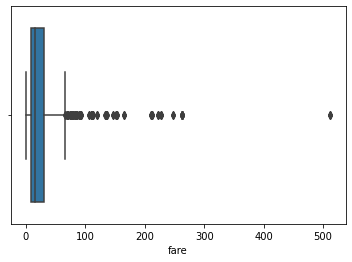

In [11]:
sns.boxplot(x = mydata['fare'])

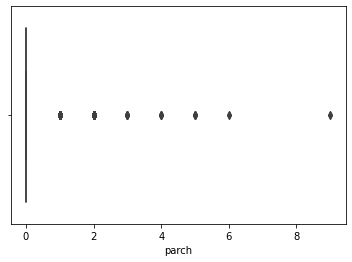

In [12]:
sns.boxplot(x = mydata['parch'])

Cannot drop outliers. 
Age cannot be droppped as it includes some of the people in the ship
Parent-Children and Siblling-spouse groups cannot be dropped as that would be breaking families 
Fares are different according to passenger class, therefore are vital in the data modelling


In [9]:
# Identifying the Missing Data
#
mydata.isnull().sum().sort_values(ascending = False)

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
pclass          0
survived        0
name            0
sex             0
sibsp           0
parch           0
ticket          0
dtype: int64

In [10]:
# identification of missing data
mydata.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


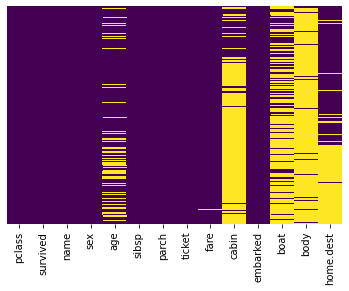

In [11]:
# visualizing missing data using heatmap
sns.heatmap(mydata.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

In [12]:
# dropped some of columns with most missing data
mydata.drop(['cabin','boat','body'],axis=1,inplace=True)
mydata.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'home.dest'],
      dtype='object')

In [30]:
mydata['fare'].fillna(value =0, inplace = True)

In [15]:
#filled in home destination with NaN for missing values as the information may be vital in further identification of the recovered bodies
mydata['home.dest'].fillna(value ="NaN", inplace = True)

In [16]:
mydata.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


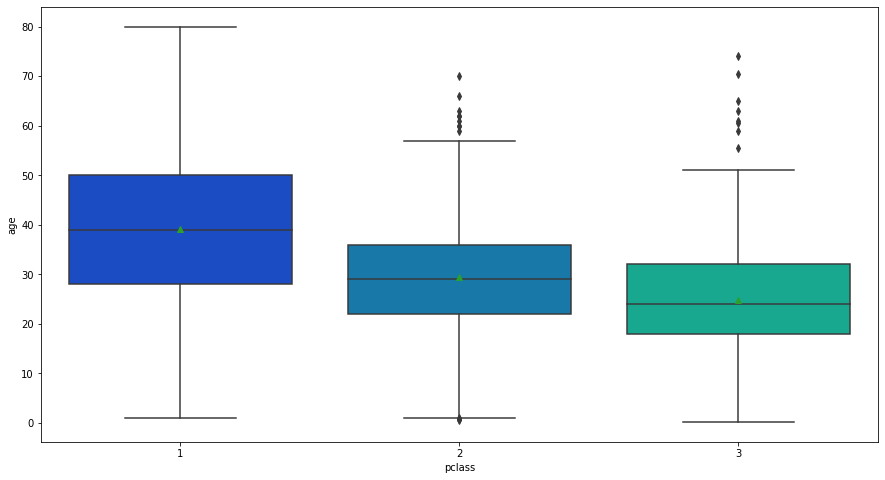

In [17]:
# Dealing with the Missing Data
# dealing with missing data for age
plt.figure(figsize = (15, 8))
sns.boxplot(x = 'pclass', y= 'age', data = mydata, palette = 'winter',showmeans= True)

In [18]:
# impute statement to replace the missing data with the mean of age for each pclass(1,2,3)
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):

    if pclass==1:
      return 37
    elif pclass== 2:
      return 29
    else:
      return 24
  else:
     return age  


In [19]:
# implementing the impute function
mydata['age']=mydata[['age','pclass']].apply(impute_age,axis = 1)

In [20]:
#changing the format of age from float to int
mydata = mydata.astype({'age':int})

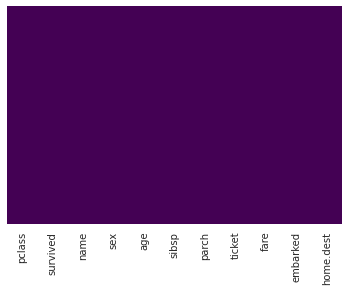

In [32]:
# confirming whether there is more missing data
sns.heatmap(mydata.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

## 6. Exploratory Analysis

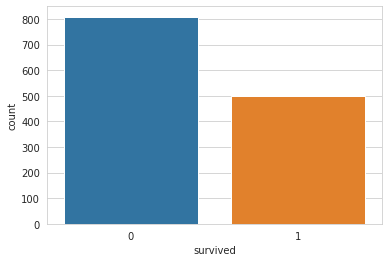

In [24]:
# comparing the number of survivors and non-survivors
sns.set_style('whitegrid')
sns.countplot(x='survived',data = mydata)

**There was a great number of non-survivors than survivors**

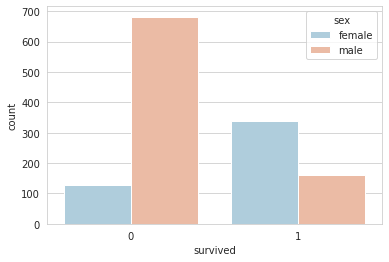

In [25]:
#comparing number of survivors and non-survivors based on sex
sns.set_style('whitegrid')
sns.countplot(x='survived', hue = 'sex' ,data = mydata, palette ='RdBu_r')

**more females survived as compared to men**

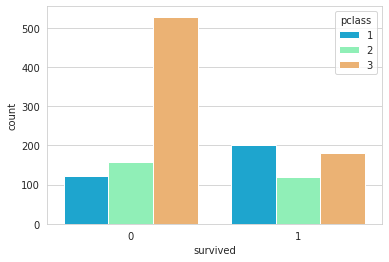

In [27]:
#comparing number of survivors and non-survivors based on pclass
sns.set_style('whitegrid')
sns.countplot(x='survived', hue = 'pclass' ,data = mydata, palette ='rainbow')

**From the barchart above, most people that died were in pclass 3 while the most number of survivors were in pclass 1**

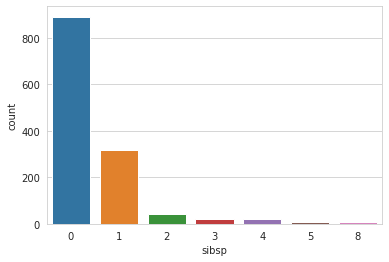

In [28]:
#frequency of people with siblings/spouses
sns.countplot(x ='sibsp', data = mydata)

**from the countplot above, most people did not have any siblings or spouses**

In [26]:
# converting categorical features such as embarked,sex into code such as 0 and 1
pd.get_dummies(mydata['embarked'],drop_first = True).head(10)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,0


In [34]:
embark=pd.get_dummies(mydata['embarked'],drop_first = True)
sex = pd.get_dummies(mydata['sex'],drop_first = True)

In [35]:
mydata.drop(['home.dest'], axis=1, inplace = True)

In [37]:
mydata.drop(['name'], axis=1, inplace = True)

In [41]:
mydata.drop(['sex','embarked'], axis = 1, inplace = True)

In [39]:
mydata = pd.concat([mydata,sex,embark],axis = 1)

In [43]:
mydata.head()

,pclass,survived,age,sibsp,parch,ticket,fare,male,Q,S
0,1,1,29,0,0,24160,211.3375,0,0,1
1,1,1,0,1,2,113781,151.55,1,0,1
2,1,0,2,1,2,113781,151.55,0,0,1
3,1,0,30,1,2,113781,151.55,1,0,1
4,1,0,25,1,2,113781,151.55,0,0,1


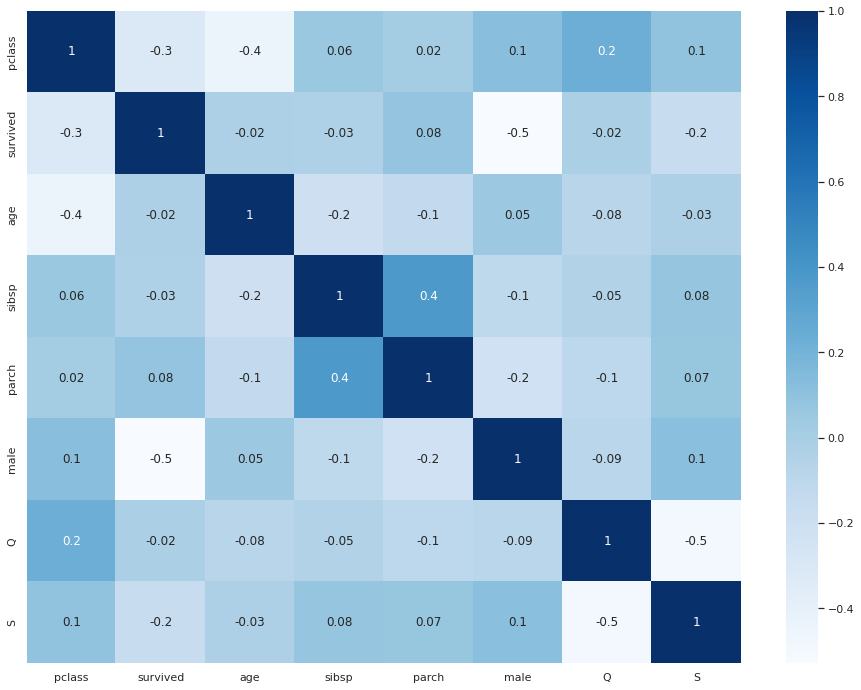

In [45]:
# finding the correlation between variables
plt.figure(figsize= (16,12))
sns.set_theme(style = 'white')
corr = mydata.corr()
heatmap = sns.heatmap(corr, annot = True, cmap = 'Blues', fmt ='.1g')

**the darker the box the more the correlation between the variables, the highest correlation is 0.4 and is between sibsp and parch**

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?